## Program Evaluation
----
<big>
    In this challenge, we will evaluate two different content delivery programs for a foreign language platform. 
 </big>

- For this challenge, our goal will be to maximize the user engagement.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

In [2]:
#for interactive visualizations

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()

In [51]:
plt.rcParams['figure.figsize'] = (10,8)

## Read Data

In [3]:
engagement_data = pd.read_csv("Data/engagement.csv")
user_data = pd.read_csv("Data/users.csv")

## Exploring the Data

In [6]:
engagement_data.head()

,user_id,browser,program,hrs_per_week
0,769245,IE,binge,4.91
1,21650570,Safari,binge,3.97
2,91760162,Chrome,drip,3.55
3,90748752,Chrome,drip,5.46
4,66876824,Chrome,binge,3.87


In [7]:
user_data.head()

,user_id,registration,country
0,90482091,2015-11-01,Germany
1,41529564,2015-11-01,Germany
2,47570654,2015-11-01,Germany
3,96119909,2015-10-31,Germany
4,57248612,2015-10-29,France


In [8]:
#data types of the engagement data set

engagement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88874 entries, 0 to 88873
Data columns (total 4 columns):
user_id         88874 non-null int64
browser         88874 non-null object
program         88874 non-null object
hrs_per_week    88874 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [9]:
#data types of the user data set
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88874 entries, 0 to 88873
Data columns (total 3 columns):
user_id         88874 non-null int64
registration    88874 non-null object
country         88874 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [4]:
#number of observations and features

engagement_data.shape

(88874, 4)

In [5]:
user_data.shape

(88874, 3)

In [10]:
#checking for missing values

engagement_data.isnull().any()

user_id         False
browser         False
program         False
hrs_per_week    False
dtype: bool

In [11]:
user_data.isnull().any()

user_id         False
registration    False
country         False
dtype: bool

## Data Wrangling
---
Before we do any data cleaning and data exploratory analysis we need to merge the both datasets so that we are not duplicating the work. we will join the both data sets based on user_id column present in both of the datasets.

In [14]:
#merged two data sets using the left join

engagement_merged_data = pd.merge(engagement_data,user_data,how="left")

In [15]:
engagement_merged_data.head()

,user_id,browser,program,hrs_per_week,registration,country
0,769245,IE,binge,4.91,2015-11-20,Germany
1,21650570,Safari,binge,3.97,2016-01-12,France
2,91760162,Chrome,drip,3.55,2016-03-21,France
3,90748752,Chrome,drip,5.46,2016-03-17,France
4,66876824,Chrome,binge,3.87,2016-04-01,Germany


## Exploratory Data Analysis
- Understanding the merged data set
- Understanding the user engagement in each platform

In [17]:
engagement_merged_data.head()

,user_id,browser,program,hrs_per_week,registration,country
0,769245,IE,binge,4.91,2015-11-20,Germany
1,21650570,Safari,binge,3.97,2016-01-12,France
2,91760162,Chrome,drip,3.55,2016-03-21,France
3,90748752,Chrome,drip,5.46,2016-03-17,France
4,66876824,Chrome,binge,3.87,2016-04-01,Germany


In [16]:
engagement_merged_data.shape

(88874, 6)

In [18]:
#Features of the merged data set
engagement_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88874 entries, 0 to 88873
Data columns (total 6 columns):
user_id         88874 non-null int64
browser         88874 non-null object
program         88874 non-null object
hrs_per_week    88874 non-null float64
registration    88874 non-null object
country         88874 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


In [19]:
#checking for missing values

engagement_merged_data.isnull().any()

user_id         False
browser         False
program         False
hrs_per_week    False
registration    False
country         False
dtype: bool

In [73]:
print("User registration start date:",engagement_merged_data.registration.min())
print("User registration end date:",engagement_merged_data.registration.max())

User registration start date: 2015-10-28
User registration end date: 2016-06-30


In [21]:
#analyzing the indicator values

engagement_merged_data["program"].value_counts()

drip     44503
binge    44371
Name: program, dtype: int64

In [37]:
#percentage of course delivery mode in the platform

round(engagement_merged_data["program"].value_counts()/engagement_merged_data.shape[0] * 100,3)

drip     50.074
binge    49.926
Name: program, dtype: float64

In [36]:
engagement_merged_data["program"].value_counts().iplot(kind = "bar",xTitle = "Course delivery mode", 
                                                       yTitle = "Count", title = "Frequency of course delivery mode")

### Distribution of numerical features
---

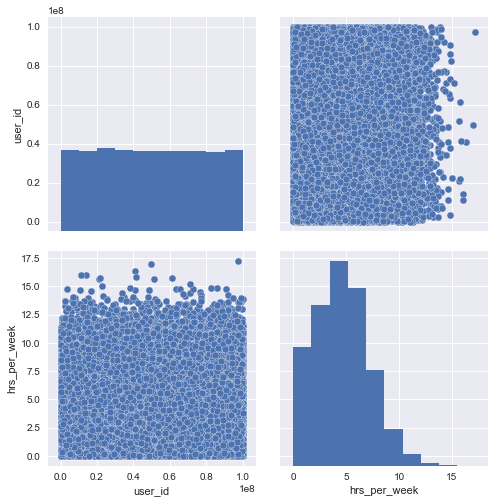

In [64]:
#pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns)
sns.pairplot(engagement_merged_data,size=3.5)
plt.show()

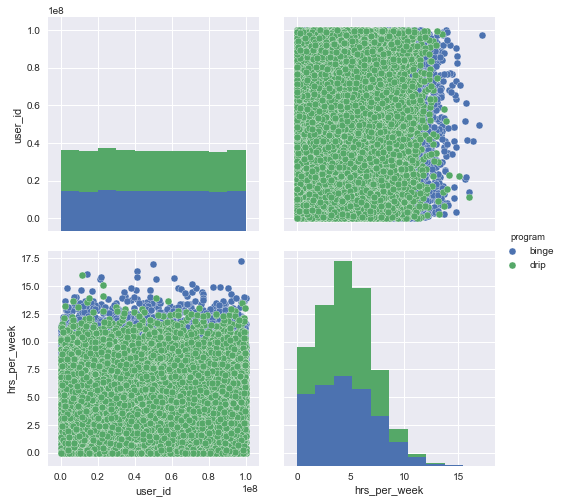

In [58]:
sns.pairplot(engagement_merged_data,hue="program",size=3.5)
plt.show()

### Distribution of categorical values
------

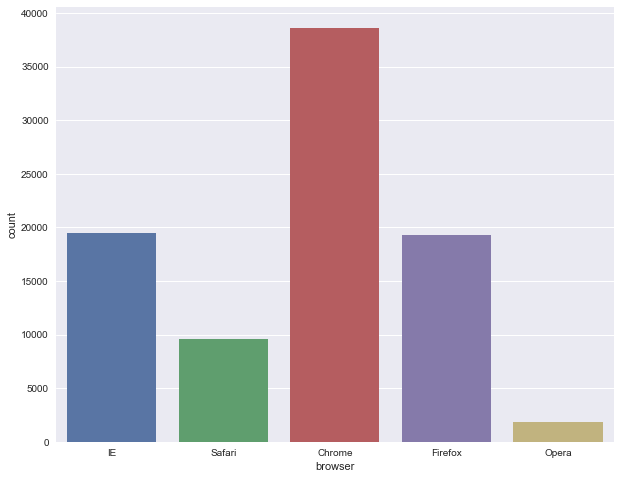

In [55]:
#type of browser

sns.countplot(x = "browser", data=engagement_merged_data)
plt.show()

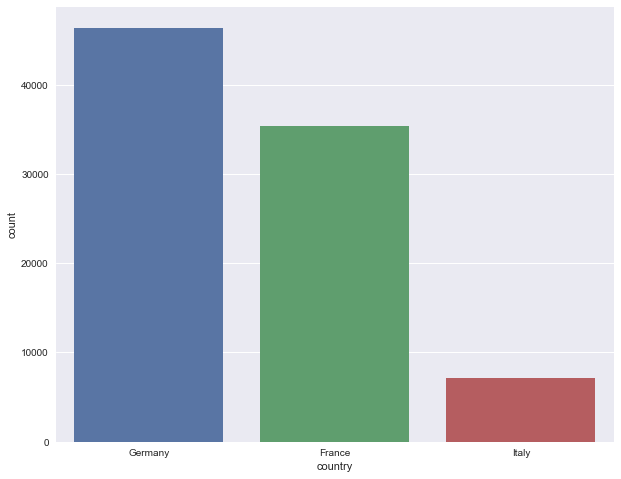

In [63]:
sns.countplot(x = "country", data=engagement_merged_data)
plt.show()

In [68]:
##using plotly 

engagement_merged_data["country"].value_counts().iplot(kind = "bar",xTitle = "Country", 
                                                       yTitle = "Count", title = "Number of users from different countries")

In [77]:
#basic stats for numerical data
engagement_merged_data.describe(percentiles=[.25,.50,.75,0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
user_id,88874.0,4.987564e+07,2.884938e+07,64.0,24918252.5,49744212.00,74868613.0,94912689.00,99999970.00
hrs_per_week,88874.0,4.601871e+00,2.529182e+00,0.0,2.7,4.51,6.3,8.92,17.23


In [78]:
#basic stats for categorical data
engagement_merged_data.describe(include="object")

,browser,program,registration,country
count,88874,88874,88874,88874
unique,5,2,247,3
top,Chrome,drip,2016-06-23,Germany
freq,38626,44503,669,46398


### Observations
----
- The dataset contains 88874 observations and 6 features.
- Out of the 6 features, there are 2 numerical features and 4 categorical features.
- There are no missing values present in the data set.
- Around 51% of the users has taken drip programming and 49% of the users has taken binge programming.
- More than 90% of the users on average spent less than 9 hrs per week on the platform.
- Most the users are coming from Germany followed by France.
- Chrome stands first among the user's browser preference to access the platform followed by Internet Explorer.

## User Engagement Evaluation
- The Key Metric for the problem is maximize the user engagement on the platform

<big>
- Analyzing which program has higher user engagement rate at overall level.
</big>

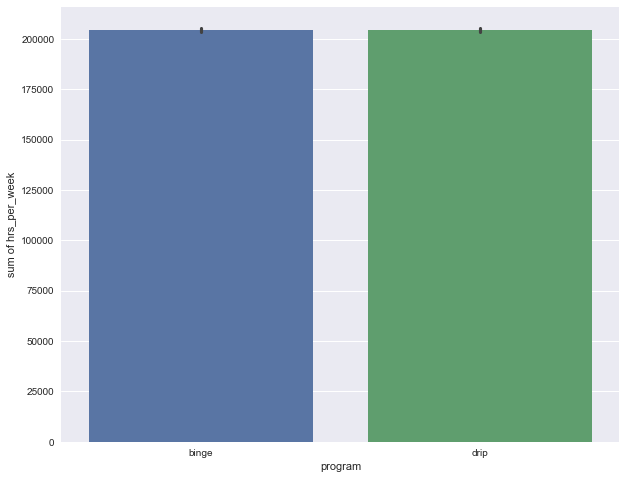

In [111]:
#using the seaborn barplot and change the estimator to sum

sns.barplot(x = "program", y = "hrs_per_week", data = engagement_merged_data,estimator=np.sum)
plt.ylabel("sum of hrs_per_week")
plt.show()

- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable

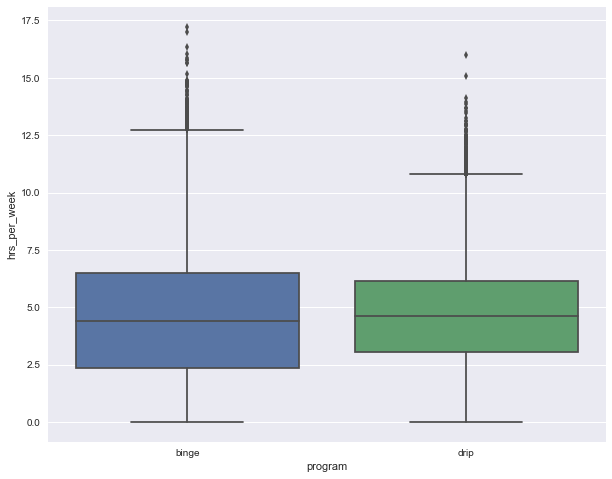

In [123]:
sns.boxplot(y = "hrs_per_week",data=engagement_merged_data,x="program")
plt.show()

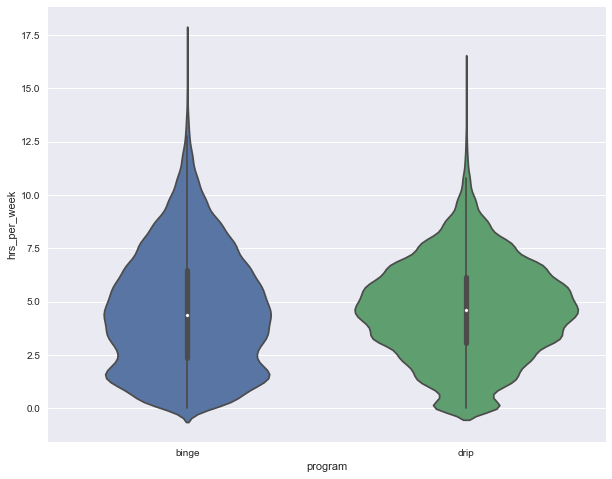

In [125]:
sns.violinplot(x = "program", y = "hrs_per_week", data=engagement_merged_data)
plt.show()

In [113]:
#sum of average hrs user spent on the platform

binge_hrs = engagement_merged_data.loc[engagement_merged_data["program"] == "binge","hrs_per_week"].sum()
binge_hrs

204367.87

In [114]:
#sum of average hrs user spent on the platform

drip_hrs = engagement_merged_data.loc[engagement_merged_data["program"] == "drip","hrs_per_week"].sum()
drip_hrs

204618.77

In [116]:
print("Sum of average hrs user spent on the platform - binge mode:",binge_hrs)
print("Sum of avergae hrs user spent on the platform - drip mode:",drip_hrs)

Sum of average hrs user spent on the platform - binge mode: 204367.87
Sum of avergae hrs user spent on the platform - drip mode: 204618.77


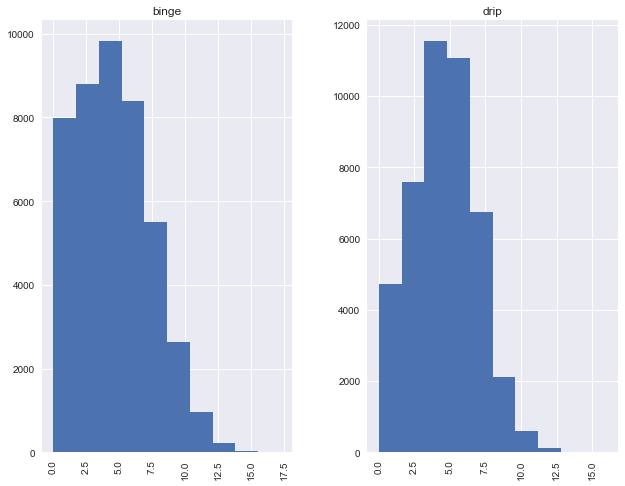

In [131]:
engagement_merged_data.hist(column="hrs_per_week",by="program")
plt.show()

## Insights
---
<big>
- From the analysis, we have seen that the user engagement for the drip program higher than the binge program marginally by 0.122%.
- In the drip program many of the users on average spent around 3 - 7 hrs per week on the platform. Very few users are spending more than 10 hrs per week.
- In the binge program most of the users on average spent around 1.5 - 7 hrs per week on the platform. Many users (around 2000) are spending more than 10hrs per week, it may be because every course in the platform is unlocked from the start.

## Segmentation 
- We will segment the user engagement across the multiple features and see whether this relationship holds good 

In [177]:
def segmentationplot(segment_by):
    
    """A function to plot the sum of overall hrs per week for different features"""
    
    fig, ax = plt.subplots(ncols=2,figsize = (14,6))
    
    #barplot calculate the total sum of user engagement for each country
    sns.barplot(x = segment_by, y = "hrs_per_week",hue = "program", data=engagement_merged_data,ax=ax[0],ci = None,estimator=np.sum)
    ax[0].set_title("Sum of hrs per week by - " + segment_by)
    ax[0].set_ylabel("Sum of hrs per week")

    
    sns.countplot(x = segment_by, hue="program", data=engagement_merged_data, ax = ax[1])
    ax[1].set_title("Distribution of users by - " + segment_by)
    
    plt.show()
    

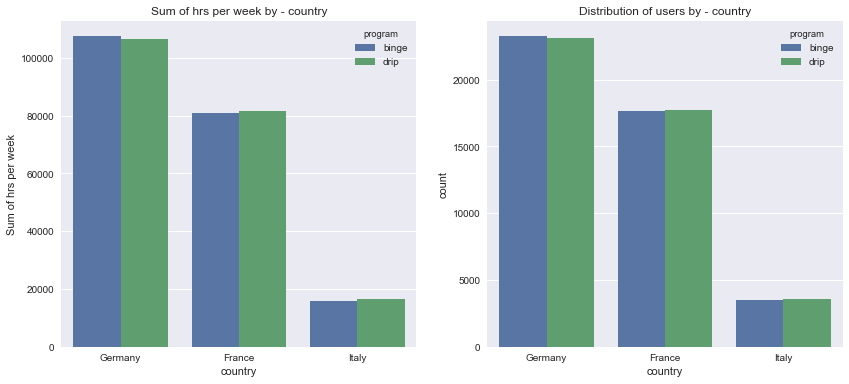

In [178]:
#segmenting the user engagement by country

segmentationplot(segment_by="country")

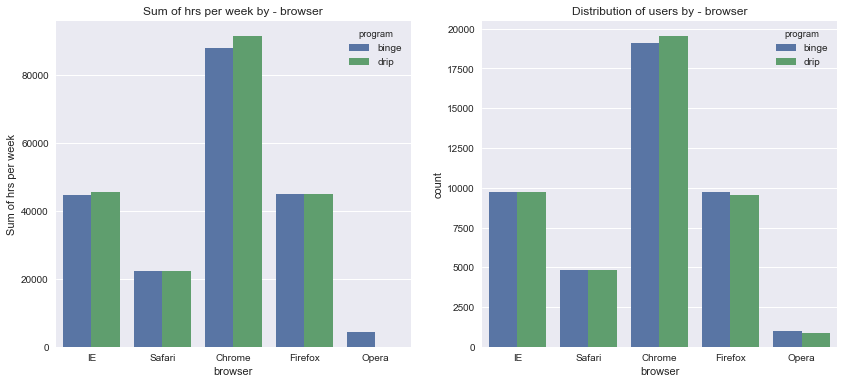

In [182]:
#segment by browser
segmentationplot(segment_by="browser")

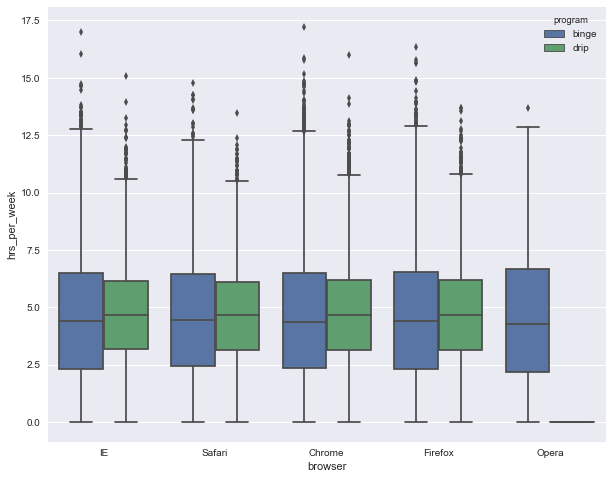

In [244]:
#segmenting the user engagement by browser and country
sns.boxplot(x = "browser", data=engagement_merged_data, y = "hrs_per_week", hue = "program")
plt.show()

In [228]:
#user engagement per Opera (browser) and drip (program)

opera_drip = pd.DataFrame(engagement_merged_data.loc[(engagement_merged_data["browser"] == "Opera") & 
                           (engagement_merged_data["program"] == "drip"),"hrs_per_week"].describe())

In [230]:
#user engagement per Opera (browser) and binge (program)

opera_binge = pd.DataFrame(engagement_merged_data.loc[(engagement_merged_data["browser"] == "Opera") &
                           (engagement_merged_data["program"] == "binge"),"hrs_per_week"].describe())

In [236]:
opera = pd.concat([opera_drip, opera_binge],axis=1)
opera.columns = ["drip_hrs_per_week", "binge_hrs_per_week"]
opera

,drip_hrs_per_week,binge_hrs_per_week
count,896.0,984.000000
mean,0.0,4.558943
std,0.0,2.802068
min,0.0,0.020000
25%,0.0,2.177500
50%,0.0,4.270000
75%,0.0,6.650000
max,0.0,13.700000


# Business Insights
---
<big>
- In case of segmenting the user engagement by country, we have seen that engagement for binge program is slightly more than the drip program for users in Germany, this might be due the more number of users has opted for binge program in Germamy.
- Apart from the Germany, in other countries we have seen that engagement for drip program is more than the binge program. The company can roll out the drip program to all the users so that the users have clear start and end of the courses.

- When segmenting the user engagement by type of user browser, except for users from opera browser the user engagement drip program is more than or equal to binge program.

- Interesting point to note in case of users from opera browser is that **all users from drip program has zero engagement rate.** The reason for this might be opera browser compatibility with the online learning platform.

- Because of this reason online portal can stop drip program for the opera browser users.